# unit 4.2 - Convolutional layers

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/culurciello/deep-learning-course-source/blob/main/source/lectures/42-conv-layer.ipynb)

What are convolutional layers and what do they compute?

We can try it out here!

Let us load an image and plot it

In [6]:
import torch
import torchvision
ima = torchvision.io.read_image("images/home.png")

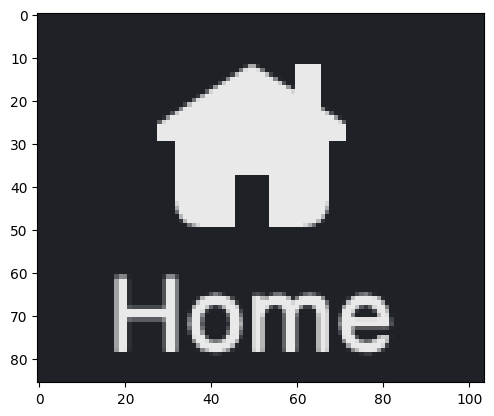

In [7]:
import matplotlib.pyplot as plt
iman = ima.permute(1, 2, 0)
# iman.shape
plt.imshow(iman)

Now we can try to run a convolutional operation from PyTorch.

Here we run 16 convolution filters of 5x5 pixels and with a stride of 2 pixels.

This runs on all 4 channels of the input image (RGBW).

You will recognize these numbers in the Conv2d operator:

In [8]:
with torch.no_grad():
    conv_layer = torch.nn.Conv2d(4, 16, 5, stride=2)
ima.shape
processed = conv_layer(ima.float())
print(processed.shape)

torch.Size([16, 41, 50])


we will now plot all the 16 images output of the Conv2d operator. You will see how each convolution processes the image. 

The convolution filter weights were randomly generated, so you will see 16 different outputs.

Some enhance vertical edges, some horizontal edges, some will blur the image, etc.

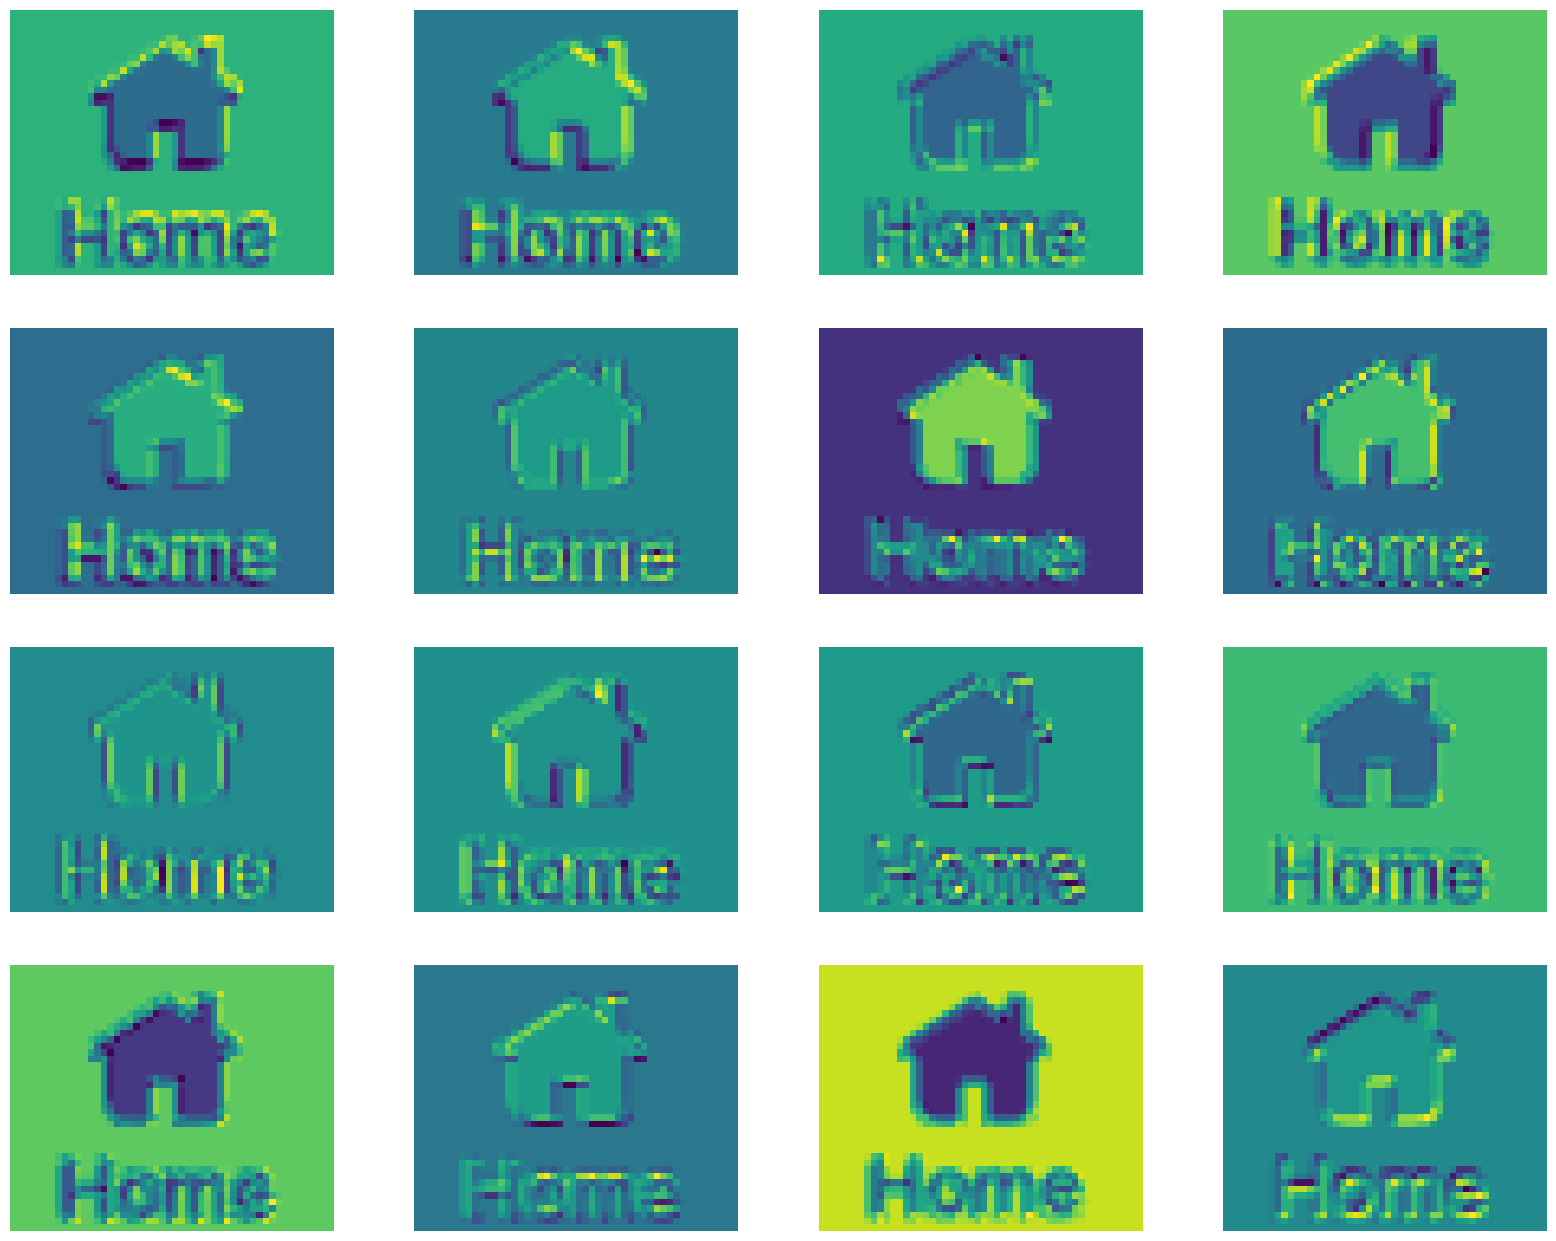

In [9]:
fig = plt.figure(figsize=(20, 20))
for i in range(len(processed)):
    a = fig.add_subplot(5, 4, i+1)
    processed_display = processed[i].detach().unsqueeze(0).permute(1, 2, 0)
#     print(processed_display.shape)
    imgplot = plt.imshow(processed_display)
    a.axis("off")